In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ete3 import Tree, ProfileFace, TreeStyle, BarChartFace

In [2]:
Demo = True # Change to False if you want to run the script on the full dataset

# Load and subset the dataframe of COGs
### list of WLP-related COGs

In [3]:
WLP = pd.read_csv("../Data/input/AllWLPGenes.csv", sep =";", comment = "#", header = 0).loc[:,["Category","Group","GeneName","COG"]]
WLP["COGName"] = WLP.GeneName+" ("+WLP.COG+")"

In [6]:
if Demo == True:
    filepath = "../Data/demo/OFOG&eOGCounts.csv"
else: filepath = "../Data/output/AllOFOG&eOGCounts.csv"

OFOGs = pd.read_csv(filepath, sep =",", comment = "#", index_col = 0, header = 0)

if Demo == True:
    AsgardSpeciesList = ["Loki 4","Thor"]
else: AsgardSpeciesList = list(pd.read_csv("../Data/input/ProposedClassification.csv", sep =",", comment = "#", header = 0).Group.unique())

RefSpeciesList = ["574087","931626","264732","33035","1123288","903814","748727","545694","903818","243232","426368","192952","323259","304371","410358","456320","419665","339860"] # List the reference species used in the notebooks
RefSpeciesList = RefSpeciesList + AsgardSpeciesList

### Subset to only the reference species and WLP genes

In [24]:
RefSpecies = OFOGs.loc[:, OFOGs.columns.isin(RefSpeciesList)]
RefSpecies

WLP_Genes = WLP.merge(RefSpecies, how = "left", left_on="COG", right_index= True).set_index("COGName").drop(["GeneName","Category","Group","COG"],axis=1).fillna(0)
WLP_Genes


,1123288,192952,243232,264732,304371,323259,33035,339860,410358,419665,426368,456320,545694,574087,748727,903814,903818,931626,Loki 4,Thor
COGName,,,,,,,,,,,,,,,,,,,,
fmdC (COG2218),0.0,2.0,2.0,0.0,2.0,3.0,0.0,1.0,2.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
ftr (COG2037),0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
mch (COG3252),0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
mtd (COG1927),0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
mer (COG2141),0.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6
mtrH (COG1962),1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2
fdhA (COG3383),8.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,7.0,4.0,7.0,8.0,0,0
fhs (COG2759),2.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1,1
folD (COG0190),1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1


### Find species names

In [14]:
NCBIRefIDs = pd.read_csv("../Data/input/NCBIRefIDs.tsv", sep ="\t", comment = "#", header = None)
NCBIRefIDs.columns = ["TaxID", "TaxName"]
NCBIRefIDs = NCBIRefIDs.astype(str).set_index("TaxID").iloc[:-3]
NCBIRefIDs

,TaxName
TaxID,
574087,Acetohalobium arabaticum
931626,Acetobacterium woodii
264732,Moorella thermoacetica
33035,Blautia producta
1123288,Sporomusa ovata
903814,Eubacterium limosum
748727,Clostridium ljungdahlii
545694,Treponema primitia
903818,Holophaga foetida


In [13]:
SpeciesIndexDF = pd.read_csv("../Data/input/SpeciesIndexDF.tsv", sep ="\t", comment = "#", header = 0, index_col = "Proteome Id")["Organism"]
SpNamesID = pd.concat([SpeciesIndexDF,NCBIRefIDs["TaxName"]])
SpNamesID

UP000324665          Thorarchaeota archaeon (strain OWC)
UP000321408    Candidatus Prometheoarchaeum syntrophicum
574087                          Acetohalobium arabaticum
931626                             Acetobacterium woodii
264732                            Moorella thermoacetica
33035                                   Blautia producta
1123288                                  Sporomusa ovata
903814                               Eubacterium limosum
748727                           Clostridium ljungdahlii
545694                                Treponema primitia
903818                                 Holophaga foetida
243232                     Methanocaldococcus jannaschii
426368                         Methanococcus maripaludis
192952                              Methanosarcina mazei
323259                         Methanospirillum hungatei
304371                           Methanocella paludicola
410358                      Methanocorpusculum labreanum
456320                         

### Build the tree with feature annotation

Manual work needed: create CombninedSpeciesTreeETE.nw made using orthofinder, NCBI ID's are slightly different to the ones from the strains in EggNOG so that's corrected in the .nw file.

/var/folders/qr/vm827mh53sd6708z2k3_tnnrz3fj08/T/ipykernel_24869/2650320215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LeavesToKeep["Feature"] = LeavesToKeep["TaxName"]


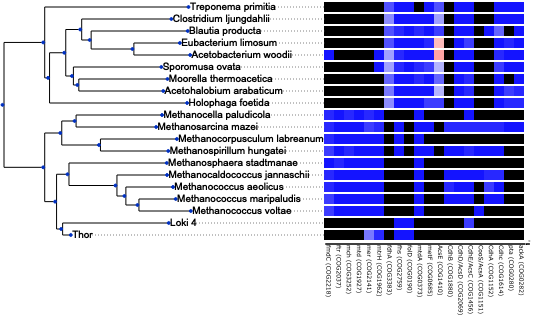

In [29]:
Combined = Tree("../Data/input/CombninedSpeciesTreeETE.nw", format=1)
Combined.ladderize()

ProposedClass = pd.read_csv("../Data/input/ProposedClassification.csv", sep =",", comment = "#", header = 0, index_col = "UPID")#["Organism"]
LeavesToKeep = ProposedClass[~ProposedClass.iloc[:,0].duplicated()]
LeavesToKeep.columns = ["TaxName"]
Combined.prune(NCBIRefIDs.index.union(LeavesToKeep.index))

#Add columns to link to the count matrix
LeavesToKeep["Feature"] = LeavesToKeep["TaxName"]
NCBIRefIDs["Feature"] = NCBIRefIDs.index

# Combine into single indexing dataframe
SpNamesID = pd.concat([LeavesToKeep,NCBIRefIDs])

# Rename the Asgard leaves so that they match the median counts instead of the chosen species
for lf in Combined.iter_leaves():
    if lf.name in list(LeavesToKeep.index):
        lf.name = LeavesToKeep.loc[lf.name][0]

# Determined after running again, but manually keep only the species so that Asgardarchaea lacking the CODH complex are not kept.
Combined.prune(RefSpeciesList)

BranchOrder = Combined.get_leaf_names()

# Add the counts to the specific leaves of the tree and change the names from TaxID to actual names
for lf in Combined.iter_leaves():
    lf.add_features(profile = WLP_Genes[lf.name].values)
    lf.add_features(deviation = [0 for x in range(len(WLP_Genes))])
    lf.add_face(ProfileFace(max_v=36.0, min_v=0.0, center_v=10.0, style='heatmap', colorscheme=4, width=len(WLP_Genes)*10, height=10), column=0, position="aligned")
    lf.name = SpNamesID.set_index("Feature")["TaxName"][lf.name]

description = list(WLP_Genes.index)
axisface = BarChartFace([0]*len(list(WLP_Genes.index)), width=len(WLP_Genes)*10, height=0, labels=list(WLP_Genes.index), max_value=1, scale_fsize=1)

ts = TreeStyle()
ts.draw_guiding_lines = True
ts.show_leaf_name = True
ts.aligned_foot.add_face(axisface, 0)
ts.show_scale = False

#Combined.render('../Data/output/heatmap.png', tree_style=ts, dpi = 75)
Combined.render("%%inline",tree_style=ts, dpi = 75)

# Plot Separately for the figure

/var/folders/qr/vm827mh53sd6708z2k3_tnnrz3fj08/T/ipykernel_24869/3967582564.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LeavesToKeep["Feature"] = LeavesToKeep["TaxName"]


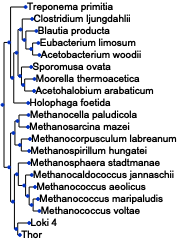

In [30]:
Combined = Tree("../Data/input/CombninedSpeciesTreeETE.nw", format=1)# made using orthofinder, NCBI ID's are slightly different to the ones from the strains in EggNOG so that's corrected in the .nw file.
Combined.ladderize()

LeavesToKeep = ProposedClass[~ProposedClass.iloc[:,0].duplicated()]
LeavesToKeep.columns = ["TaxName"]
Combined.prune(NCBIRefIDs.index.union(LeavesToKeep.index))

#Add columns to link to the count matrix
LeavesToKeep["Feature"] = LeavesToKeep["TaxName"]
NCBIRefIDs["Feature"] = NCBIRefIDs.index

# Combine into single indexing dataframe
SpNamesID = pd.concat([LeavesToKeep,NCBIRefIDs])

# Rename the Asgard leaves so that they match the median counts instead of the chosen species
for lf in Combined.iter_leaves():
    if lf.name in list(LeavesToKeep.index):
        lf.name = LeavesToKeep.loc[lf.name][0]

Combined.prune(RefSpeciesList)

BranchOrder = Combined.get_leaf_names()

        
# Add the counts to the specific leaves of the tree and change the names from TaxID to actual names
for lf in Combined.iter_leaves():
    lf.name = SpNamesID.set_index("Feature")["TaxName"][lf.name]

description = list(WLP_Genes.index)
axisface = BarChartFace([0]*len(list(WLP_Genes.index)), width=len(WLP_Genes)*10, height=0, labels=list(WLP_Genes.index), max_value=1, scale_fsize=1)

ts = TreeStyle()
ts.draw_guiding_lines = True
ts.show_leaf_name = True
ts.aligned_foot.add_face(axisface, 0)
ts.scale =  20
ts.show_scale = False

#Combined.render('../Data/output/heatmap.png', tree_style=ts, dpi = 75)
Combined.render("%%inline",tree_style=ts, dpi = 75)

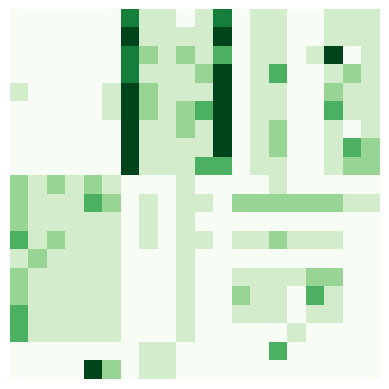

In [31]:
plt.imshow(WLP_Genes.loc[WLP.COGName[WLP.Category == "Metabolic"]].T.loc[BranchOrder], cmap='Greens', interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.show()